In [128]:
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
d = path.os.path.dirname(path.os.path.realpath('__file__'))

# Gerando uma Word Cloud com base discurso do Temer (18/05/2017)

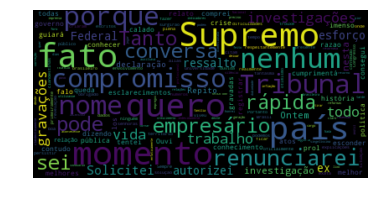

In [168]:
# le o arquivo txt com o discurso
# fonte: http://g1.globo.com/politica/noticia/veja-a-integra-do-discurso-de-michel-temer.ghtml
text = open('dicurso_temer.txt', 'r').read()

# adiciona os stopwords
stopwords = set(STOPWORDS)
for word in open('stopwords.txt', 'r').read().split('\n'):    
    stopwords.add(word)
    
# cria a wordcloud definindo fonte tamanho maximo
wordcloud = WordCloud(max_font_size=40, stopwords=stopwords).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Salva o arquivo da imagem
wordcloud.to_file(path.join(d, "word_cloud.png"))

# Gerando uma Word Cloud com base no mapa do Brasil

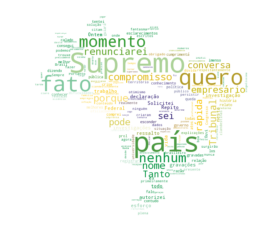

In [169]:
# fonte: http://www.trilhaseaventuras.com.br/wp-content/uploads/2014/01/Mapa-do-Brasil.png
img_brasil = np.array(Image.open(path.join(d, "Mapa-do-Brasil.png")))

# Gera a word cloud
wc = WordCloud(background_color="white", max_words=2000, mask=img_brasil, stopwords=stopwords,random_state=42)
wc.generate(text)

# Proecessa a word cloud com base na imagem
image_colors = ImageColorGenerator(img_brasil)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.figure()

# Salva a imagem
wc.to_file(path.join(d, "brasil.png"))